# TextRecognitionDataGenerator demo

Github
- https://github.com/Belval/TextRecognitionDataGenerator

DOCS
- https://textrecognitiondatagenerator.readthedocs.io/en/latest/?badge=latest

In [20]:
# TextRecognitionDataGenerator 설치
# pip install trdg

신발 상품번호와 유사한 랜덤 문자열 생성

In [21]:
import random   
import string  
import secrets
from PIL import Image

num_string = 8 # 최대 num개의 문자 선택
total_string = 5 

# 영어 대문자, 숫자, -, # 공백을 포함한 랜덤 문자열 생성
results = []
for _ in range(total_string):
    random_string = ''.join(secrets.choice(string.ascii_uppercase + string.digits + '-' + ' ' + '#') for x in range(num_string))
    results.append(random_string)
results[:5]

['XTU4KE2P', 'ZSSPTKX9', 'JZQY7XCJ', 'CY08B97V', '8KAPSS63']

메타데이터 기록할 데이터프레임 생성

In [22]:
import pandas as pd
df = pd.DataFrame({'file_name':[],'file_size':[],'image_h':[],'image_w':[],'product_no':[],'status':[]})
df

,file_name,file_size,image_h,image_w,product_no,status


데이터에 다양성을 줄 요소
- 글씨 색상
- 이미지 크기
- 흐림 정도
- 폰트는 거의 고딕?

XTU4KE2P


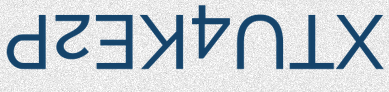


ZSSPTKX9


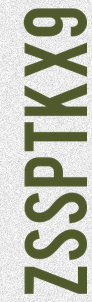


JZQY7XCJ


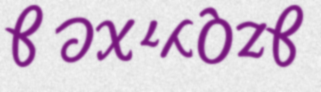


CY08B97V


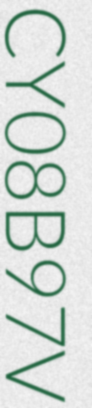


8KAPSS63


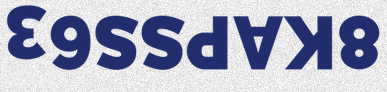

In [23]:
from trdg.generators import (
    GeneratorFromDict,
    GeneratorFromRandom,
    GeneratorFromStrings,
    GeneratorFromWikipedia,
)

# 이미지 저장을 위한 syns_images 생성
from pathlib import Path
Path("./syns_images").mkdir(parents=False, exist_ok=True)

# The generators use the same arguments as the CLI, only as parameters
generator = GeneratorFromStrings(
    strings = results,    # 문자열
    count = total_string, # 생성할 이미지 개수
    size = 92,            # 이미지 가로 길이
    # distorsion_type = 3,  # 왜곡 정도
    blur = 1,             # 흐림 정도
    random_blur = True,   # 흐림 랜덤
    text_color = '#000000,#888888', # 색상 랜덤
)

x = 0

random_rotation = [Image.ROTATE_90, Image.ROTATE_180, Image.ROTATE_270]
for img, lbl in generator:
    # 메타데이터 추가
    df=df.append({'file_name': lbl+'.jpg', 'product_no' : lbl , 'image_h' : img.size[0], 'image_w':img.size[1], 'status' : 'Blur'} , ignore_index=True)
    print(lbl)                  # 문자열 출력
    img = img.transpose(random.choice(random_rotation))
    img.show()                  # 이미지 출력
    # img.save(f'syns/{lbl}.jpg') # 이미지 저장
    print()

데이터프레임 확인

In [24]:
df

,file_name,file_size,image_h,image_w,product_no,status
0,XTU4KE2P.jpg,NaN,389.0,92.0,XTU4KE2P,Blur
1,ZSSPTKX9.jpg,NaN,302.0,92.0,ZSSPTKX9,Blur
2,JZQY7XCJ.jpg,NaN,321.0,92.0,JZQY7XCJ,Blur
3,CY08B97V.jpg,NaN,408.0,92.0,CY08B97V,Blur
4,8KAPSS63.jpg,NaN,387.0,92.0,8KAPSS63,Blur
